In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [2]:
import pandas as pd
pd.set_option("display.max_columns", 60)
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from  nltk import FreqDist
from nltk.collocations import *
import string
np.random.seed(0)
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/flationschool/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/flationschool/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('fake_job_postings.csv')

In [4]:
df.drop(['job_id'], axis =1, inplace = True)
df.rename(columns = {'location':'state'}, inplace = True)

### Cleaning up the State column

In [5]:
df = df[df.state.str.contains('US', na=False)]
df['state'] = [x[4:6] for x in df.state]
df['state'] = np.where(df.state == '', 'Nan', df.state)
df['state'] = np.where(df.state == ', ', 'Nan', df.state)

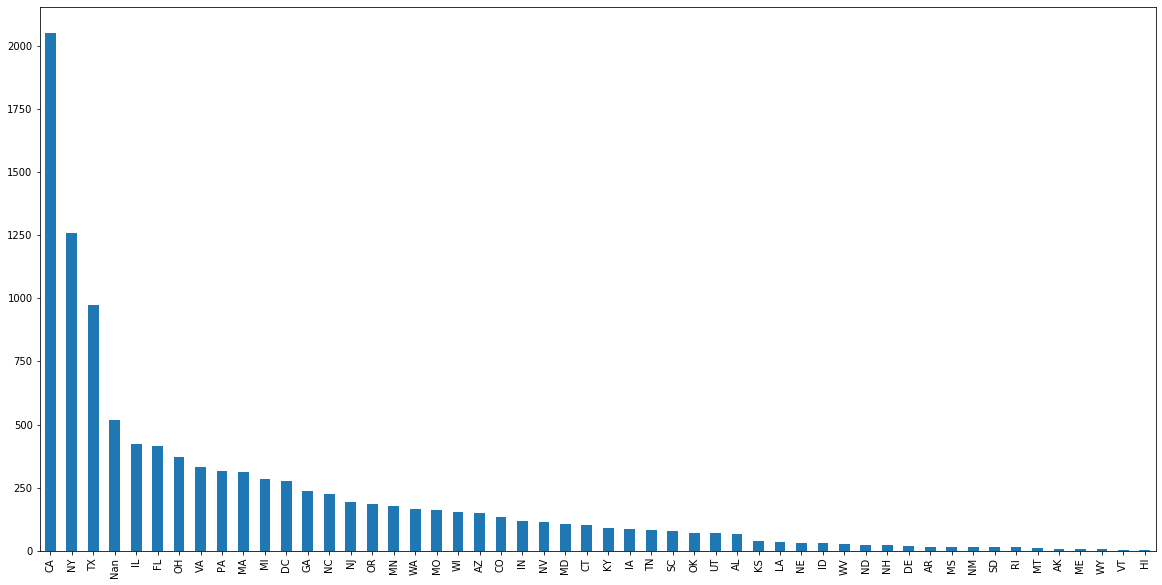

In [6]:
df.state.value_counts().plot(kind='bar', figsize = (20,10))

(<matplotlib.axes._subplots.AxesSubplot at 0x1a20ba1d68>, 0    9926
 1     730
 Name: fraudulent, dtype: int64)

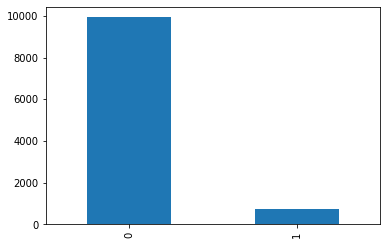

In [7]:
df.fraudulent.value_counts().plot(kind='bar'), df.fraudulent.value_counts()

In [8]:
pd.crosstab(df.fraudulent, df.state)

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,Nan,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
fraudulent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,58,16,147,1908,128,99,269,17,385,218,2,82,28,406,110,34,80,31,304,72,6,274,176,154,12,8,208,21,26,20,187,16,103,1191,479,354,66,184,303,13,74,14,80,823,67,325,5,153,148,27,8
1,2,7,1,4,143,6,5,7,2,30,20,2,3,2,18,9,6,12,3,9,35,2,11,3,6,5,2,17,2,5,1,6,0,10,68,39,18,3,2,13,1,5,2,4,152,2,7,0,14,4,0,0


In [ ]:
df.head()

### Overall Job Descriptions Analysis 

In [9]:
description = [x.lower() for x in df.description]
description = str(description)
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenized_description = nltk.regexp_tokenize(description, pattern)
'Total Number of Words: {}'.format(len(tokenized_description)) 

'Total Number of Words: 2181586'

##### Frequency Distribution of Description

Before removing stop word

In [10]:
description_freqdist = FreqDist(tokenized_description)
description_freqdist.most_common(50)

[('xa', 176832),
 ('and', 112849),
 ('to', 61005),
 ('the', 57511),
 ('a', 44157),
 ('of', 40510),
 ('in', 33144),
 ('for', 28696),
 ('with', 25464),
 ('our', 18321),
 ('is', 17132),
 ('you', 14821),
 ('we', 14773),
 ('are', 13441),
 ('as', 13310),
 ('be', 12282),
 ('will', 11791),
 ('on', 11699),
 ('team', 10256),
 ('or', 9294),
 ('work', 9185),
 ('that', 8773),
 ('an', 8564),
 ('b', 8177),
 ('all', 8153),
 ('f', 8069),
 ('e', 7960),
 ('d', 7919),
 ('this', 7694),
 ('experience', 6867),
 ('have', 6731),
 ('customer', 6705),
 ('c', 6547),
 ('sales', 6370),
 ('business', 6302),
 ('company', 6228),
 ('your', 5722),
 ('by', 5519),
 ('new', 5415),
 ('s', 5141),
 ('service', 5062),
 ('at', 4972),
 ('other', 4928),
 ('management', 4858),
 ('job', 4777),
 ('position', 4623),
 ('from', 4576),
 ('looking', 4397),
 ('development', 4387),
 ('services', 4352)]

In [11]:
'Total Number of Unique Words Including Stop Words: {}'.format(len(description_freqdist))

'Total Number of Unique Words Including Stop Words: 38907'

Removing Stop Words

In [13]:
nonwords = set((x for x in tokenized_description if len(x) <=2))

In [15]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'aaa','aaab','aabbf','aac','aaabe','aaae','aaaf','aaahc','abc','abap','abb','abcd','abcdeb','abf','abfceafd','abfe','abfea','abba', 'eebd', 'abcb','abcf', 'eeeb','abd','abdaa','abdab','abdcd','abe', 'bbac','abeb', 'caebb','abeef','abef','ac','aca','abs','cae','aker','absa','aab','aabd','cdb','cfd','decc','aada','aadc','cae','dfef','aadf','aas','aaece','aaf','amp']
stopwords_list += nonwords

description_stopped = [word for word in tokenized_description if word not in stopwords_list]

In [25]:
nonwords2 = set(sorted(description_stopped)[:70])
description_stopped = [word for word in description_stopped if word not in nonwords2]

In [37]:
stopwords_list += nonwords2 # This is added so there's a full stopwords_list for removing stopwords from the next dataframes

In [26]:
description_stopped_freqdist = FreqDist(description_stopped)
description_stopped_freqdist.most_common(100)

[('team', 10256),
 ('work', 9185),
 ('experience', 6867),
 ('customer', 6705),
 ('sales', 6370),
 ('business', 6302),
 ('company', 6228),
 ('new', 5415),
 ('service', 5062),
 ('management', 4858),
 ('job', 4777),
 ('position', 4623),
 ('looking', 4397),
 ('development', 4387),
 ('services', 4352),
 ('support', 4262),
 ('time', 4249),
 ('product', 4186),
 ('url', 3972),
 ('client', 3926),
 ('data', 3813),
 ('marketing', 3753),
 ('design', 3735),
 ('provide', 3569),
 ('customers', 3524),
 ('clients', 3471),
 ('skills', 3434),
 ('including', 3307),
 ('responsibilities', 3180),
 ('project', 3171),
 ('required', 3065),
 ('quality', 3053),
 ('products', 3041),
 ('ensure', 2854),
 ('based', 2854),
 ('must', 2853),
 ('high', 2818),
 ('solutions', 2744),
 ('working', 2740),
 ('responsible', 2677),
 ('opportunity', 2631),
 ('apply', 2582),
 ('well', 2576),
 ('manager', 2552),
 ('software', 2538),
 ('include', 2526),
 ('process', 2520),
 ('duties', 2494),
 ('develop', 2452),
 ('help', 2449),
 ('g

In [27]:
'Total Number of Unique Words Without Stop Words: {}'.format(len(description_stopped_freqdist))

'Total Number of Unique Words Without Stop Words: 38329'

50 Most Common Words found in desriptions

<BarContainer object of 50 artists>

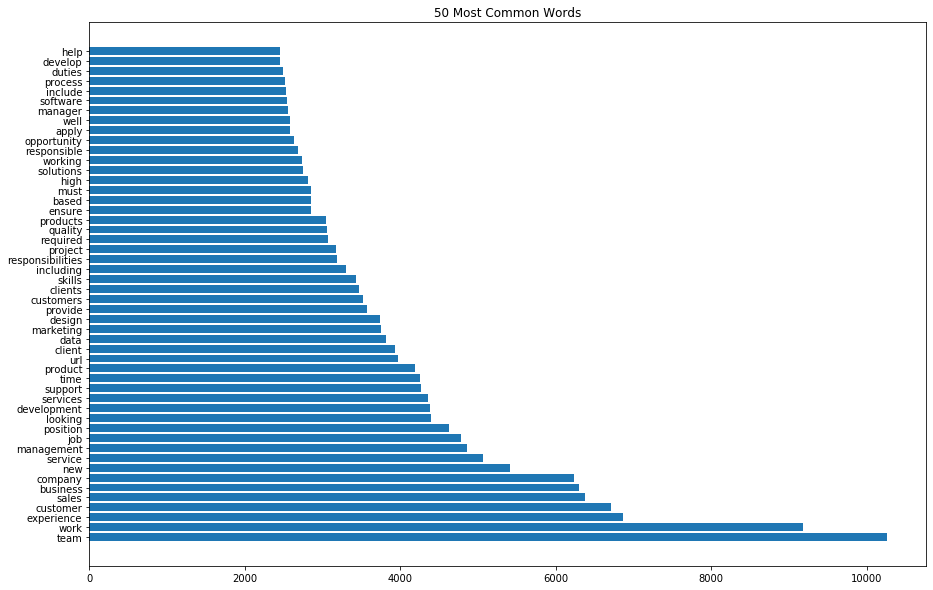

In [28]:
most_comm_50 = description_stopped_freqdist.most_common(50)
Words = [(word) for word,count in most_comm_50]
Count = [(count) for word,count in most_comm_50]
plt.figure(figsize=(15,10))
plt.title('50 Most Common Words')
plt.barh(Words, Count)

50 Most Common Bigrams

In [29]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
description_finder = BigramCollocationFinder.from_words(description_stopped_freqdist)
description_bigrams_scored = description_finder.score_ngrams(bigram_measures.raw_freq)

In [30]:
description_bigrams_scored[:50]

[(('abandoned', 'indulge'), 2.6089905815440007e-05),
 (('abandoning', 'thingsevery'), 2.6089905815440007e-05),
 (('abandonment', 'rosters'), 2.6089905815440007e-05),
 (('abaqus', 'formulas'), 2.6089905815440007e-05),
 (('abatement', 'demolition'), 2.6089905815440007e-05),
 (('abbottsford', 'thorp'), 2.6089905815440007e-05),
 (('abbreviations', 'formsensuring'), 2.6089905815440007e-05),
 (('abdominal', 'fractured'), 2.6089905815440007e-05),
 (('aberdeen', 'deputies'), 2.6089905815440007e-05),
 (('abet', 'preferredleed'), 2.6089905815440007e-05),
 (('abide', 'captels'), 2.6089905815440007e-05),
 (('abiding', 'proceduresmanages'), 2.6089905815440007e-05),
 (('abiity', 'functionalityaccount'), 2.6089905815440007e-05),
 (('abililty', 'captured'), 2.6089905815440007e-05),
 (('abilities', 'membersmanage'), 2.6089905815440007e-05),
 (('abilitiesability', 'seneca'), 2.6089905815440007e-05),
 (('abilitiesaccredited', 'interactivity'), 2.6089905815440007e-05),
 (('abilitiesacting', 'silly'), 2.60

<BarContainer object of 50 artists>

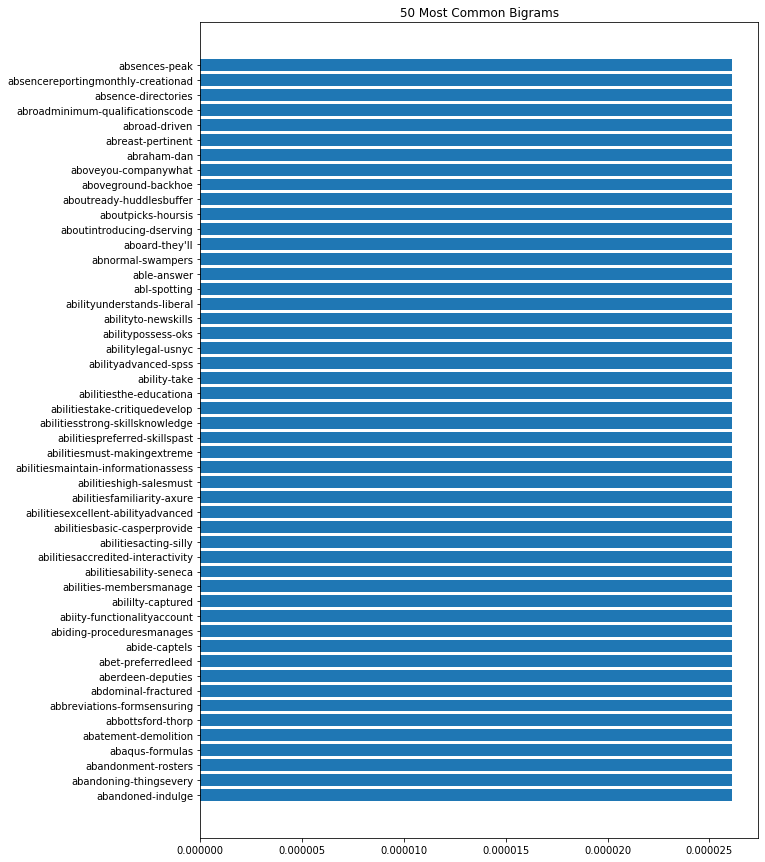

In [31]:
bigrams_50 = description_bigrams_scored[:50]
bigram = ['-'.join(bigram) for bigram, freq in bigrams_50]
freq = [freq for bigram,freq in bigrams_50]

plt.figure(figsize=(10,15))
plt.title('50 Most Common Bigrams')
plt.barh(bigram, freq)

Conclude that no difference among common bigrams?

In [32]:
description_pmi_finder = BigramCollocationFinder.from_words(description_stopped_freqdist)
description_pmi_finder.apply_freq_filter(1)
description_pmi_scored = description_pmi_finder.score_ngrams(bigram_measures.pmi)
description_pmi_scored[:50]

[(('abandoned', 'indulge'), 15.226148738401143),
 (('abandoning', 'thingsevery'), 15.226148738401143),
 (('abandonment', 'rosters'), 15.226148738401143),
 (('abaqus', 'formulas'), 15.226148738401143),
 (('abatement', 'demolition'), 15.226148738401143),
 (('abbottsford', 'thorp'), 15.226148738401143),
 (('abbreviations', 'formsensuring'), 15.226148738401143),
 (('abdominal', 'fractured'), 15.226148738401143),
 (('aberdeen', 'deputies'), 15.226148738401143),
 (('abet', 'preferredleed'), 15.226148738401143),
 (('abide', 'captels'), 15.226148738401143),
 (('abiding', 'proceduresmanages'), 15.226148738401143),
 (('abiity', 'functionalityaccount'), 15.226148738401143),
 (('abililty', 'captured'), 15.226148738401143),
 (('abilities', 'membersmanage'), 15.226148738401143),
 (('abilitiesability', 'seneca'), 15.226148738401143),
 (('abilitiesaccredited', 'interactivity'), 15.226148738401143),
 (('abilitiesacting', 'silly'), 15.226148738401143),
 (('abilitiesbasic', 'casperprovide'), 15.226148738

### Finding Differences in Descriptions Between Fraudulent and Non-Fraudulent Postins

#### Fraudulent DataFrame

In [33]:
fraud_df = df[df.fraudulent == 1]

In [34]:
f_description = [x.lower() for x in fraud_df.description]
f_description = str(f_description)
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenized_fdescription = nltk.regexp_tokenize(f_description, pattern)
'Total Number of Words: {}'.format(len(tokenized_fdescription))

'Total Number of Words: 134707'

##### Frequency Distribution Prior To Removing Stop Words

In [35]:
description_freqdist = FreqDist(tokenized_fdescription)
description_freqdist.most_common(50)

[('and', 7297),
 ('xa', 4172),
 ('to', 4044),
 ('the', 3867),
 ('a', 2673),
 ('of', 2478),
 ('in', 1961),
 ('for', 1873),
 ('with', 1597),
 ('are', 1120),
 ('is', 1065),
 ('we', 951),
 ('work', 936),
 ('you', 849),
 ('on', 840),
 ('as', 733),
 ('or', 714),
 ('our', 649),
 ('e', 644),
 ('be', 623),
 ('amp', 565),
 ('will', 558),
 ('this', 543),
 ('that', 542),
 ('d', 518),
 ('from', 510),
 ('all', 483),
 ('team', 475),
 ('position', 448),
 ('project', 442),
 ('experience', 437),
 ('customer', 436),
 ('c', 430),
 ('b', 428),
 ('company', 425),
 ('business', 408),
 ('time', 405),
 ('f', 405),
 ('service', 405),
 ('have', 394),
 ('skills', 391),
 ('looking', 387),
 ('management', 386),
 ('support', 366),
 ('an', 362),
 ('your', 360),
 ('engineering', 352),
 ('by', 331),
 ('other', 330),
 ('solutions', 322)]

In [36]:
'Total Number of Unique Words Including Stop Words: {}'.format(len(description_freqdist))

'Total Number of Unique Words Including Stop Words: 7560'

##### Removing Stop Words

In [38]:
f_description_stopped = [word for word in tokenized_fdescription if word not in stopwords_list]

In [39]:
f_description_freqdist = FreqDist(f_description_stopped)
f_description_freqdist.most_common(50)

[('work', 936),
 ('team', 475),
 ('position', 448),
 ('project', 442),
 ('experience', 437),
 ('customer', 436),
 ('company', 425),
 ('business', 408),
 ('time', 405),
 ('service', 405),
 ('skills', 391),
 ('looking', 387),
 ('management', 386),
 ('support', 366),
 ('engineering', 352),
 ('solutions', 322),
 ('equipment', 315),
 ('data', 309),
 ('within', 306),
 ('job', 302),
 ('new', 299),
 ('product', 295),
 ('provide', 293),
 ('services', 280),
 ('ensure', 273),
 ('products', 272),
 ('people', 270),
 ('quality', 261),
 ('process', 256),
 ('information', 252),
 ('systems', 243),
 ('industry', 242),
 ('required', 238),
 ('customers', 235),
 ('responsibilities', 232),
 ('full', 232),
 ('url', 232),
 ('manager', 231),
 ('design', 228),
 ('including', 225),
 ('technical', 218),
 ('must', 215),
 ('development', 212),
 ('perform', 210),
 ('duties', 208),
 ('maintenance', 203),
 ('requirements', 199),
 ('per', 195),
 ('test', 193),
 ('responsible', 191)]

In [40]:
'Total Number of Unique Words Including Stop Words: {}'.format(len(f_description_freqdist))

'Total Number of Unique Words Including Stop Words: 7246'

##### Bar Chart of Most Common 50 Words in Fraudulent descriptions

<BarContainer object of 50 artists>

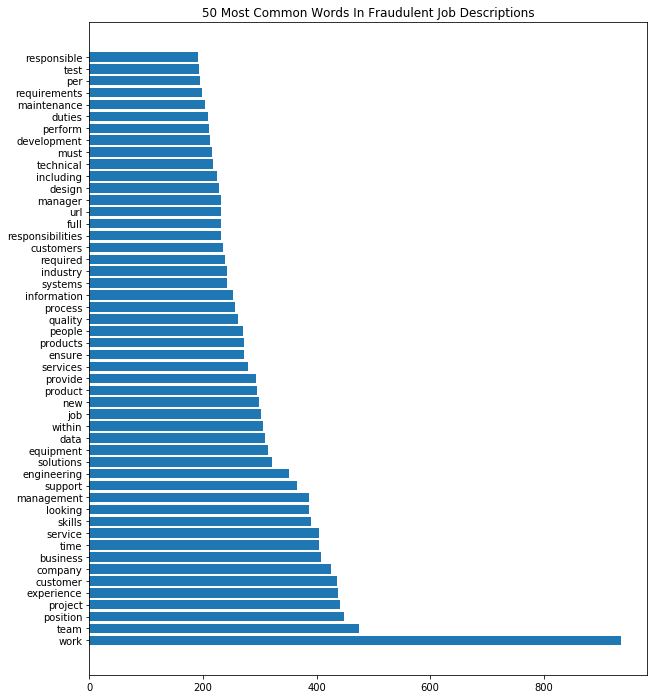

In [41]:
fd_most_comm_50 = f_description_freqdist.most_common(50)
fWords = [(word) for word,count in fd_most_comm_50]
fCount = [(count) for word,count in fd_most_comm_50]
plt.figure(figsize=(10,12))
plt.title('50 Most Common Words In Fraudulent Job Descriptions')
plt.barh(fWords, fCount)

##### 50 Most Common Bigrams in Fraudulent Job Posting Descriptions

In [42]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
fdescription_finder = BigramCollocationFinder.from_words(f_description_stopped)
fdescription_bigrams_scored = fdescription_finder.score_ngrams(bigram_measures.raw_freq)
fdescription_bigrams_scored[:50]

[(('customer', 'service'), 0.002146896814005128),
 (('oil', 'gas'), 0.0018892691963245127),
 (('full', 'time'), 0.0016684455240268423),
 (('gas', 'industry'), 0.0015334977242893772),
 (('data', 'entry'), 0.0014844257971121171),
 (('communication', 'skills'), 0.0009691705617508864),
 (('work', 'home'), 0.0009569025799565713),
 (('part', 'time'), 0.0009078306527793113),
 (('project', 'management'), 0.0007728828530418461),
 (('ultra', 'luxury'), 0.0007728828530418461),
 (('global', 'provider'), 0.000723810925864586),
 (('per', 'week'), 0.000687006980481641),
 (('industry', 'engineering'), 0.0006747389986873259),
 (('engineering', 'design'), 0.000662471016893011),
 (('approximately', 'people'), 0.0006502030350986959),
 (('bring', 'discoveries'), 0.0006502030350986959),
 (('business', 'people'), 0.0006502030350986959),
 (('countries', 'url'), 0.0006502030350986959),
 (('design', 'technology'), 0.0006502030350986959),
 (('discoveries', 'production'), 0.0006502030350986959),
 (('employ', 'app

<BarContainer object of 50 artists>

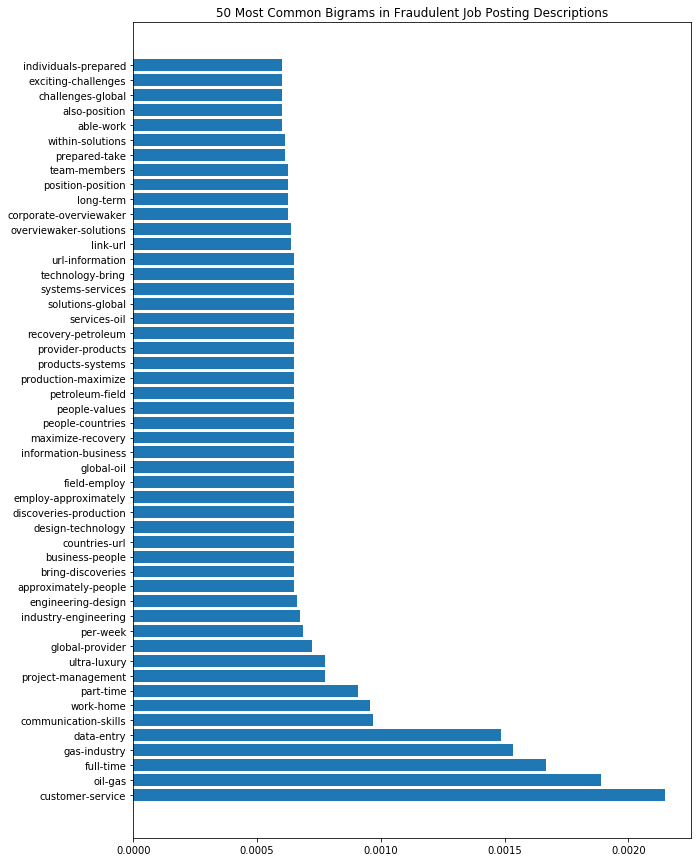

In [53]:
bigrams_50 = fdescription_bigrams_scored[:50]
fbigram = ['-'.join(bigram) for bigram, freq in bigrams_50]
freq = [freq for bigram,freq in bigrams_50]

plt.figure(figsize=(10,15))
plt.title('50 Most Common Bigrams in Fraudulent Job Posting Descriptions')
plt.barh(fbigram, freq)

#### Non-Fraudulent Job Posting Descriptions DataFrame

In [44]:
nfraud_df = df[df.fraudulent == 0]
nf_description = [x.lower() for x in nfraud_df.description]
nf_description = str(nf_description)
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenized_nfdescription = nltk.regexp_tokenize(nf_description, pattern)
'Total Number of Words: {}'.format(len(tokenized_nfdescription))

'Total Number of Words: 2046879'

##### Frequency Distribution Prior To Removing Stop Words

In [45]:
description_freqdist = FreqDist(tokenized_nfdescription)
description_freqdist.most_common(50)

[('xa', 172660),
 ('and', 105552),
 ('to', 56961),
 ('the', 53644),
 ('a', 41484),
 ('of', 38032),
 ('in', 31183),
 ('for', 26823),
 ('with', 23867),
 ('our', 17672),
 ('is', 16067),
 ('you', 13972),
 ('we', 13822),
 ('as', 12577),
 ('are', 12321),
 ('be', 11659),
 ('will', 11233),
 ('on', 10859),
 ('team', 9781),
 ('or', 8580),
 ('work', 8249),
 ('that', 8231),
 ('an', 8202),
 ('b', 7749),
 ('all', 7670),
 ('f', 7664),
 ('d', 7401),
 ('e', 7316),
 ('this', 7151),
 ('experience', 6430),
 ('have', 6337),
 ('customer', 6269),
 ('sales', 6185),
 ('c', 6117),
 ('business', 5894),
 ('company', 5803),
 ('your', 5362),
 ('by', 5188),
 ('new', 5116),
 ('s', 4907),
 ('at', 4659),
 ('service', 4657),
 ('other', 4598),
 ('job', 4475),
 ('management', 4472),
 ('development', 4175),
 ('position', 4175),
 ('it', 4142),
 ('services', 4072),
 ('from', 4066)]

In [46]:
'Total Number of Unique Words Including Stop Words: {}'.format(len(description_freqdist))

'Total Number of Unique Words Including Stop Words: 37179'

##### Removing Stop Words

In [47]:
nf_description_stopped = [word for word in tokenized_nfdescription if word not in stopwords_list]
nf_description_freqdist = FreqDist(nf_description_stopped)
nf_description_freqdist.most_common(50)

[('team', 9781),
 ('work', 8249),
 ('experience', 6430),
 ('customer', 6269),
 ('sales', 6185),
 ('business', 5894),
 ('company', 5803),
 ('new', 5116),
 ('service', 4657),
 ('job', 4475),
 ('management', 4472),
 ('development', 4175),
 ('position', 4175),
 ('services', 4072),
 ('looking', 4010),
 ('support', 3896),
 ('product', 3891),
 ('time', 3844),
 ('client', 3789),
 ('url', 3740),
 ('marketing', 3680),
 ('design', 3507),
 ('data', 3504),
 ('clients', 3377),
 ('customers', 3289),
 ('provide', 3276),
 ('including', 3082),
 ('skills', 3043),
 ('responsibilities', 2948),
 ('required', 2827),
 ('quality', 2792),
 ('products', 2769),
 ('based', 2736),
 ('project', 2729),
 ('high', 2667),
 ('must', 2638),
 ('working', 2583),
 ('ensure', 2581),
 ('opportunity', 2492),
 ('responsible', 2486),
 ('software', 2437),
 ('well', 2426),
 ('solutions', 2422),
 ('apply', 2405),
 ('include', 2376),
 ('growth', 2367),
 ('manager', 2321),
 ('help', 2306),
 ('develop', 2296),
 ('website', 2290)]

In [48]:
'Total Number of Unique Words Including Stop Words: {}'.format(len(nf_description_freqdist))

'Total Number of Unique Words Including Stop Words: 36629'

##### Bar Chart of Most Common 50 Words in Non-Fraudulent descriptions

<BarContainer object of 50 artists>

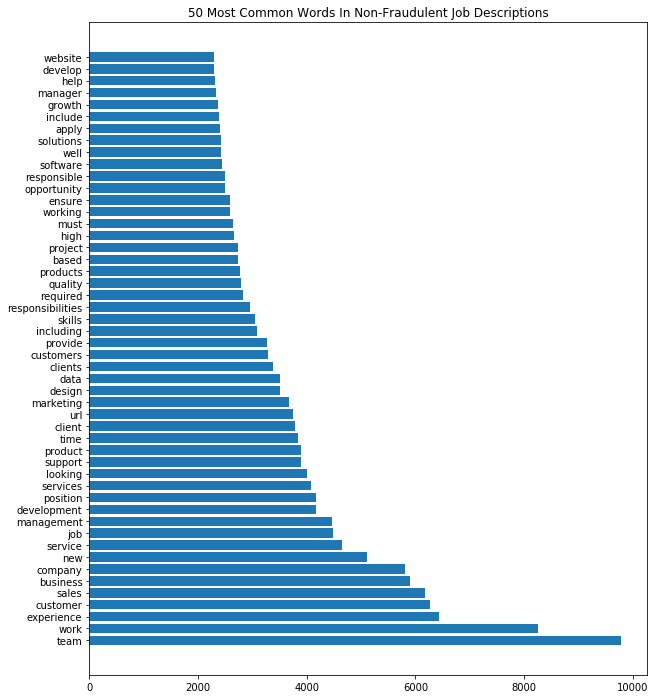

In [50]:
nfd_most_comm_50 = nf_description_freqdist.most_common(50)
nfWords = [(word) for word,count in nfd_most_comm_50]
nfCount = [(count) for word,count in nfd_most_comm_50]
plt.figure(figsize=(10,12))
plt.title('50 Most Common Words In Non-Fraudulent Job Descriptions')
plt.barh(nfWords, nfCount)

##### 50 Most Common Bigrams in Non-Fraudulent Descriptions

In [61]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
nfdescription_finder = BigramCollocationFinder.from_words(nf_description_stopped)
nfdescription_bigrams_scored = nfdescription_finder.score_ngrams(bigram_measures.raw_freq)
nfdescription_bigrams_scored[:50]

[(('customer', 'service'), 0.001657465328799138),
 (('full', 'time'), 0.0010627020445862546),
 (('get', 'paid'), 0.0006201281889807856),
 (('social', 'media'), 0.0006035098030983669),
 (('team', 'members'), 0.0005947632842128833),
 (('student', 'loans'), 0.0005886407209930448),
 (('cost', 'living'), 0.0005868914172159481),
 (('loans', 'credit'), 0.0005860167653273997),
 (('monthly', 'cost'), 0.0005860167653273997),
 (('ideal', 'candidate'), 0.0005851421134388514),
 (('kids', 'get'), 0.0005781448983304644),
 (('play', 'kids'), 0.0005781448983304644),
 (('responsibilities', 'include'), 0.0005746462907762711),
 (('usd', 'monthly'), 0.0005571532530053039),
 (('join', 'team'), 0.0005527799935625621),
 (('living', 'housing'), 0.0005457827784541752),
 (('integral', 'part'), 0.0005396602152343367),
 (('click', 'apply'), 0.0005335376520144982),
 (('fast', 'paced'), 0.0005335376520144982),
 (('apply', 'directly'), 0.0005326630001259499),
 (('relevant', 'job'), 0.0005326630001259499),
 (('website

<BarContainer object of 50 artists>

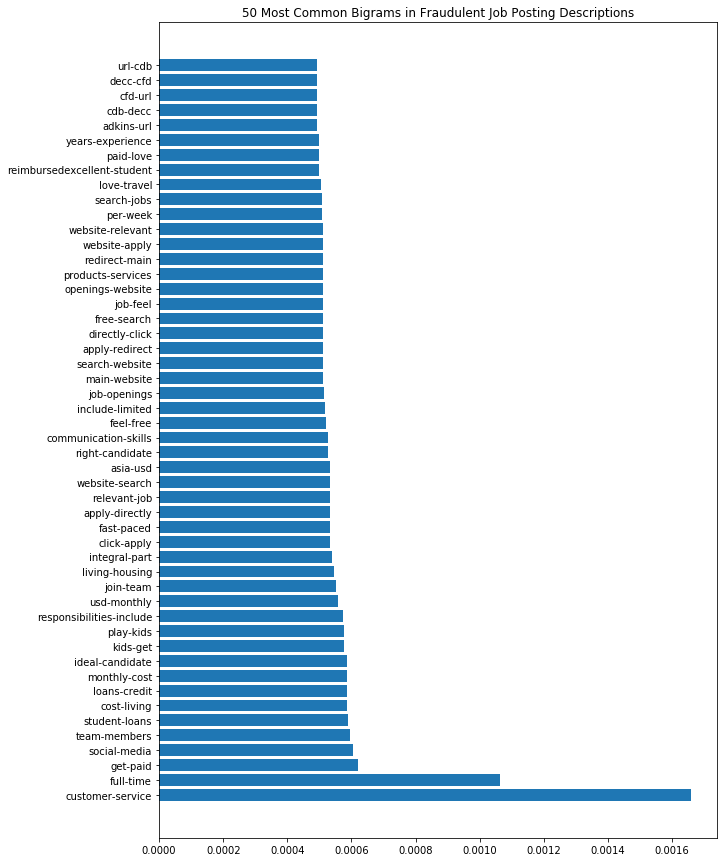

In [62]:
bigrams_50 = nfdescription_bigrams_scored[:50]
nfbigram = ['-'.join(bigram) for bigram, freq in bigrams_50]
freq = [freq for bigram,freq in bigrams_50]

plt.figure(figsize=(10,15))
plt.title('50 Most Common Bigrams in Fraudulent Job Posting Descriptions')
plt.barh(nfbigram, freq)

In [55]:
def bigrams_not_in_common(bigram1,bigram2):
    bnic =[]
    for x in bigram1:
        if x not in bigram2:
            bnic.append(x)
    return bnic

In [65]:
bigrams_not_in_common(fbigram, nfbigram)

['oil-gas',
 'gas-industry',
 'data-entry',
 'work-home',
 'part-time',
 'project-management',
 'ultra-luxury',
 'global-provider',
 'industry-engineering',
 'engineering-design',
 'approximately-people',
 'bring-discoveries',
 'business-people',
 'countries-url',
 'design-technology',
 'discoveries-production',
 'employ-approximately',
 'field-employ',
 'global-oil',
 'information-business',
 'maximize-recovery',
 'people-countries',
 'people-values',
 'petroleum-field',
 'production-maximize',
 'products-systems',
 'provider-products',
 'recovery-petroleum',
 'services-oil',
 'solutions-global',
 'systems-services',
 'technology-bring',
 'url-information',
 'link-url',
 'overviewaker-solutions',
 'corporate-overviewaker',
 'long-term',
 'position-position',
 'prepared-take',
 'within-solutions',
 'able-work',
 'also-position',
 'challenges-global',
 'exciting-challenges',
 'individuals-prepared']

In [ ]:
def count_vectorize(description, vocab=None):
    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(description))
    
    words_dict = {i:0 for i in unique_words}
    
    for word in description:
        words_dict[word] += 1
    
    return words_dict

Removing stop words

In [ ]:
Vocabulary = {'Total Vocab': 13274500, 'Tokenized Vocab': 1863472, 'Unique Words': 1196742}
plt.bar(Vocabulary.keys(), Vocabulary.values())